In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [131]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [132]:
train.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [133]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [134]:
train.HomePlanet.groupby(train.Transported).value_counts()

Transported  HomePlanet
False        Earth         2651
             Mars           839
             Europa         727
True         Earth         1951
             Europa        1404
             Mars           920
Name: count, dtype: int64

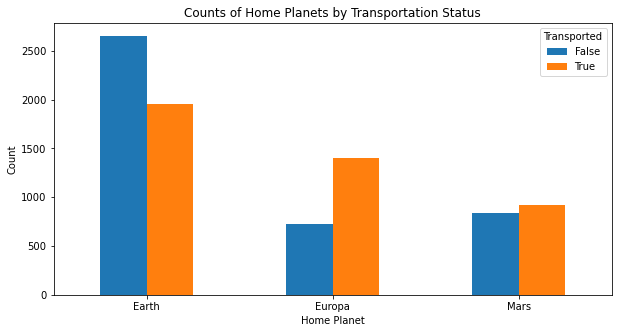

In [135]:
data_to_plot = train.groupby('Transported')['HomePlanet'].value_counts().unstack(level=0)

# Plotting
data_to_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Counts of Home Planets by Transportation Status')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.legend(title='Transported')
plt.show()

In [136]:
train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

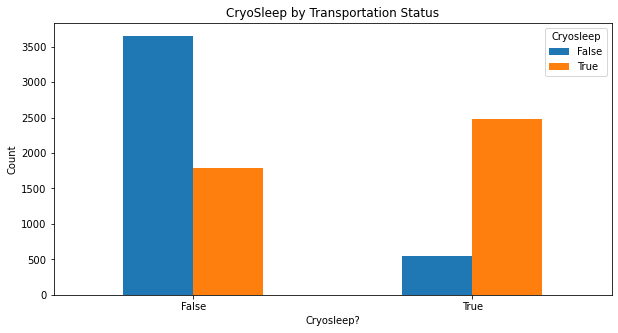

In [137]:
data_to_plot = train.groupby('Transported')['CryoSleep'].value_counts().unstack(level=0)

# Plotting
data_to_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Cryosleep?')
plt.ylabel('Count')
plt.title('CryoSleep by Transportation Status')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.legend(title='Cryosleep')
plt.show()

seems to be an important predictor

In [138]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [139]:
train['Cabin'].nunique()

6560

In [140]:
train['Cabin'].head(10)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [141]:
train['Cabin'].str.split('/')[0]

['B', '0', 'P']

In [142]:
train['Cabin'].fillna('null').apply(lambda x: x.split('/')[0]).head()

0    B
1    F
2    A
3    A
4    F
Name: Cabin, dtype: object

In [143]:
train['CabDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0] if pd.notna(x) else x)
train['CabNum'] = train['Cabin'].apply(lambda x: x.split('/')[1] if pd.notna(x) else x)
train['CabSide'] = train['Cabin'].apply(lambda x: x.split('/')[2] if pd.notna(x) else x)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabDeck       8494 non-null   object 
 15  CabNum        8494 non-null   object 
 16  CabSide       8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


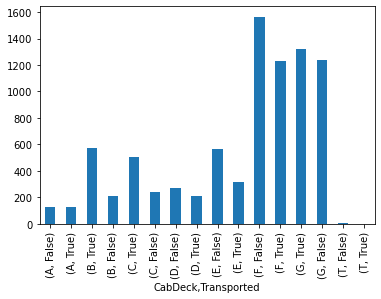

In [145]:
train.groupby('CabDeck')['Transported'].value_counts().plot(kind='bar')
plt.show()

In [147]:
train[train['CabNum'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,NaN,NaN,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,NaN,NaN,NaN
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,NaN,NaN,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,NaN,NaN,NaN
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False,NaN,NaN,NaN
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False,NaN,NaN,NaN
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True,NaN,NaN,NaN
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,NaN,NaN,NaN


In [148]:
# Fill in null values
train[['CabDeck', 'CabNum', 'CabSide']].describe()

,CabDeck,CabNum,CabSide
count,8494,8494,8494
unique,8,1817,2
top,F,82,S
freq,2794,28,4288


In [150]:
import pandas as pd

# Convert 'CabNum' to numeric, coercing errors to NaN
train['CabNum'] = pd.to_numeric(train['CabNum'], errors='coerce')

# Calculate the median of 'CabNum' after conversion
median_cabnum = train['CabNum'].median()

# Replace NaN values with the median
train['CabNum'] = train['CabNum'].fillna(median_cabnum)

# Convert to 'Int64' for nullable integer type
train['CabNum'] = train['CabNum'].astype('Int64')

# Display DataFrame info to confirm the updates
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabDeck       8494 non-null   object 
 15  CabNum        8693 non-null   Int64  
 16  CabSide       8494 non-null   object 
dtypes: Int64(1), bool(1), float64(6), object(9)
memory usage: 1.1+ MB


In [151]:
train[['CabDeck', 'CabNum', 'CabSide']].describe(include='all')

,CabDeck,CabNum,CabSide
count,8494,8693.0,8494
unique,8,<NA>,2
top,F,<NA>,S
freq,2794,<NA>,4288
mean,NaN,596.398942,NaN
std,NaN,506.637799,NaN
min,NaN,0.0,NaN
25%,NaN,173.0,NaN
50%,NaN,427.0,NaN
75%,NaN,983.0,NaN


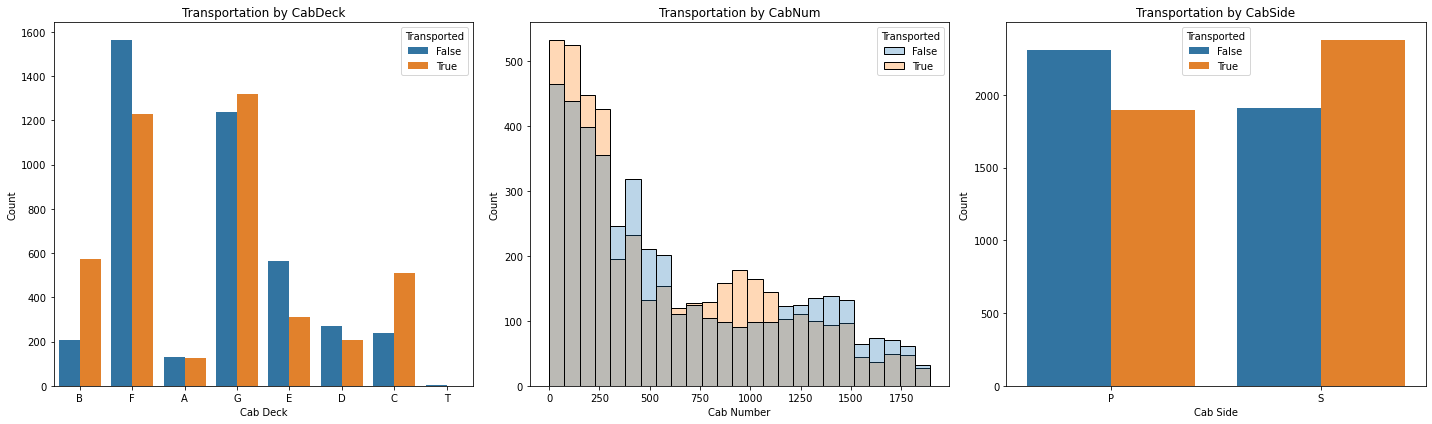

In [158]:
# Setting up the figure and subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 6))  # Correct figsize and subplot creation

# Plot for CabDeck
sns.countplot(data=train, x='CabDeck', hue='Transported', ax=ax[0])
ax[0].set_title("Transportation by CabDeck")  # Set title method corrected
ax[0].set_xlabel('Cab Deck')
ax[0].set_ylabel('Count')

# Plot for CabNum
sns.histplot(data=train, x='CabNum', hue='Transported', alpha = 0.3, ax=ax[1])
ax[1].set_title("Transportation by CabNum")
ax[1].set_xlabel('Cab Number')
ax[1].set_ylabel('Count')

# Plot for CabSide
sns.countplot(data=train, x='CabSide', hue='Transported', ax=ax[2])
ax[2].set_title("Transportation by CabSide")
ax[2].set_xlabel('Cab Side')
ax[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()